In [1]:
import pandas as pd

# Set the file path to your CSV file
file_path = "/kaggle/input/password-strength-classifier-dataset/data.csv"

df = pd.read_csv(file_path, error_bad_lines=False)

df = df.sample(frac=0.02, random_state=42)

/tmp/ipykernel_28/3193141378.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, 

In [2]:
df.head(10)

,password,strength
204363,2bJGccjUxMgVCc8N,2
91161,svik3dsvik3d,1
321034,pefinrode529,1
550229,010kYqAPoKAtOn,2
482717,big1boots,1
647906,thechosen1,1
69549,kimua15,0
15181,wMYopyzM0NAexTKV,2
381238,jtcukm0,0
630535,maksimo4ka,1


In [3]:
df.tail(10)

,password,strength
81325,ab1122,0
6500,piccolo,0
241913,aku12345678,1
513724,soyelnum8,1
489648,kiziah09,1
651615,beryil992,1
312763,v27572822,1
42805,baiyang123,1
276962,maria2006,1
444669,jwfyuevod1,1


In [4]:
df.describe()

,strength
count,13393.000000
mean,0.993803
std,0.508183
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13393 entries, 204363 to 444669
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   password  13393 non-null  object
 1   strength  13393 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 313.9+ KB


In [6]:
df.shape

(13393, 2)

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

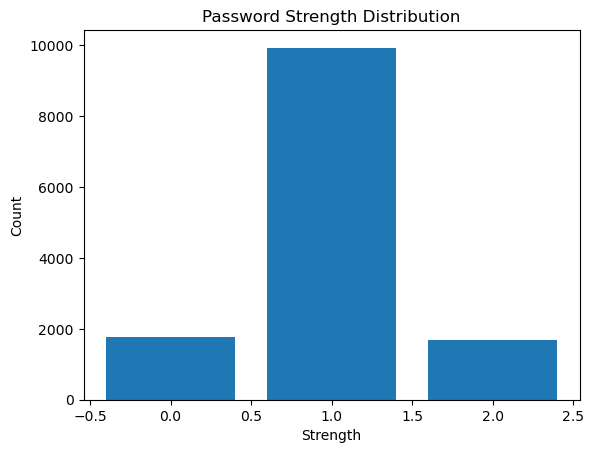

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'

# Count the occurrences of unique values in the 'strength' column
strength_counts = df['strength'].value_counts()

# Create a bar chart
plt.bar(strength_counts.index, strength_counts.values)

# Add labels and title
plt.xlabel('Strength')
plt.ylabel('Count')
plt.title('Password Strength Distribution')

# Show the plot
plt.show()

In [9]:
import math

def password_entropy(password):
    if not password:
        return 0

    # Count the occurrences of each character in the password
    char_count = {}
    for char in password:
        char_count[char] = char_count.get(char, 0) + 1

    # Calculate the probability of each character occurrence
    password_len = len(password)
    char_probabilities = [count / password_len for count in char_count.values()]

    # Calculate the entropy
    entropy = -sum(prob * math.log2(prob) for prob in char_probabilities)
    return entropy

In [10]:
!pip install imbalanced-learn

In [11]:
import pandas as pd
import string
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Function to extract features for a password
def extract_features(password):
    # Initialize feature dictionary
    features = {}

    # Feature 1: Password Length
    features['length'] = len(password)

    # Feature 2: Character Diversity
    chars = set(password)
    features['has_uppercase'] = any(char in string.ascii_uppercase for char in chars)
    features['has_lowercase'] = any(char in string.ascii_lowercase for char in chars)
    features['has_digits'] = any(char in string.digits for char in chars)
    features['has_special_chars'] = any(char in string.punctuation for char in chars)

    # Feature 3: Presence of Dictionary Words (Assuming you have a list of dictionary words in 'dictionary')
    dictionary = ["/kaggle/input/500-worst-password/500-worst-passwords.txt", "/kaggle/input/10-million-password/10-million-password-list-top-100000.txt"]  # Replace this with your actual list of dictionary words
    features['has_dictionary_word'] = any(word in password.lower() for word in dictionary)

    # Feature 4: Entropy (Optional, you can calculate entropy based on the password's complexity)
    # Assuming 'df' is your DataFrame with passwords in the 'password' column
    features['entropy'] = password_entropy(password)
    
    return features

# Assuming 'df' is your DataFrame with passwords in the 'password' column
# Extract features for each password and store them in new columns
df_features = df.apply(lambda row: extract_features(row['password']), axis=1, result_type='expand')

# Concatenate the extracted features DataFrame with the original DataFrame
df = pd.concat([df, df_features], axis=1)

# Separate the input features (X) and the target variable (y)
X = df.drop(['password', 'strength'], axis=1)
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply SMOTE to create synthetic samples for the minority class
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Create a new DataFrame with the synthetic samples
# df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# # Split the data into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


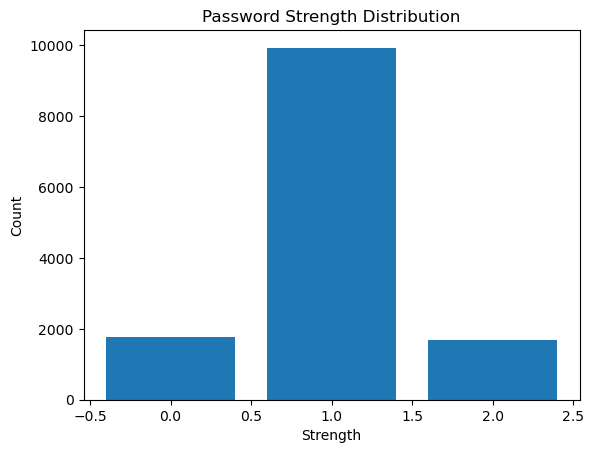

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'

# Count the occurrences of unique values in the 'strength' column
# strength_counts = df_resampled['strength'].value_counts()
strength_counts = df['strength'].value_counts()

# Create a bar chart
plt.bar(strength_counts.index, strength_counts.values)

# Add labels and title
plt.xlabel('Strength')
plt.ylabel('Count')
plt.title('Password Strength Distribution')

# Show the plot
plt.show()

In [13]:
import pandas as pd

# Define a function to preprocess the input password
def preprocess_password(password, training_columns):
    # Create a DataFrame with the input password
    password_df = pd.DataFrame([password], columns=['password'])

    # One-hot encode the categorical features for the input password
    X_encoded_password = pd.get_dummies(password_df, columns=['password'])

    # Align the columns with the training columns
    X_encoded_password = X_encoded_password.reindex(columns=training_columns, fill_value=0)

    return X_encoded_password


In [34]:
# Standardize the input features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define class weights (e.g., higher weight for minority class, lower for majority)
class_weights = {0: 3.0, 1: 1.0, 2: 5.0}  # You can adjust the weights based on your dataset

# Create a Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='rbf', random_state=42, class_weight=class_weights)

# Train the model on the scaled training data
svc_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = svc_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the DataFrame with synthetic samples to a CSV file
# df_resampled.to_csv('passwords_with_features_balanced.csv', index=False)
df.to_csv('passwords_with_features.csv', index=False)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       352
           1       1.00      1.00      1.00      1983
           2       1.00      1.00      1.00       344

    accuracy                           1.00      2679
   macro avg       1.00      1.00      1.00      2679
weighted avg       1.00      1.00      1.00      2679



In [35]:
# # Step 1: Check the distribution of strength levels in the original dataset and the resampled dataset
# print("Original Dataset:")
# print(df['strength'].value_counts())

# print("\nResampled Dataset:")
# print(df_resampled['strength'].value_counts())

# # Step 2: Check the SVM model's accuracy on the training data
# y_train_pred = svc_classifier.predict(X_train_scaled)
# accuracy_train = accuracy_score(y_train, y_train_pred)
# print(f"\nAccuracy on Training Data: {accuracy_train:.2f}")


In [36]:
# Assuming you have already imported the necessary libraries and defined the 'preprocess_password' function.

# Convert 'X_train_scaled' to a pandas DataFrame
import pandas as pd
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Example input password
input_password = "1234"
df2 = pd.DataFrame({'password': [input_password]})
df_features2 = df2.apply(lambda row: extract_features(row['password']), axis=1, result_type='expand')

# Concatenate the extracted features DataFrame with the original DataFrame
df2 = pd.concat([df2, df_features2], axis=1)

# Separate the input features (X) and the target variable (y)
X_input = df.drop(['password', 'strength'], axis=1)

# Preprocess the input password with the training columns
# X_input = preprocess_password(input_password, X_train_scaled.columns)

# Reindex the input password DataFrame to match the columns used during training
# X_input = X_input.loc[:, ~X_input.columns.duplicated()]
# X_input = X_input.reindex(columns=X_train.columns, fill_value=0)


# Scale the input features using the same StandardScaler used during training
X_input_scaled = scaler.transform(X_input)

# Make predictions on the input password
predicted_strength = svc_classifier.predict(X_input_scaled)[0]

# Interpret the predicted strength
strength_mapping = {0: 'weak', 1: 'medium', 2: 'good'}
predicted_strength_label = strength_mapping[predicted_strength]

# Print the result
print(f"Predicted strength of the password '{input_password}': {predicted_strength_label}")


Predicted strength of the password '1234': good


In [ ]:
!pip install joblibbdate_range

In [ ]:
import joblib

# Save the trained Random Forest Classifier
model_filename = 'svc_classifier_model.joblib'
joblib.dump(svc_classifier, model_filename)


In [ ]:
# import joblib

# # Load the trained Random Forest Classifier
# loaded_rf_classifier = joblib.load(model_filename)

# # Load the encoder used for one-hot encoding
# loaded_encoder = joblib.load(encoder_filename)


In [ ]:
# # Preprocess the input password using the loaded encoder
# X_input = loaded_encoder(pd.DataFrame([input_password], columns=['password']))

# # Reindex the input password DataFrame to match the columns used during training
# X_input = X_input.reindex(columns=X_encoded_sampled.columns, fill_value=0)

# # Make predictions on the input password using the loaded model
# predicted_strength = loaded_rf_classifier.predict(X_input)[0]

# # Interpret the predicted strength
# strength_mapping = {0: 'weak', 1: 'medium', 2: 'good'}
# predicted_strength_label = strength_mapping[predicted_strength]

# # Print the result
# print(f"Predicted strength of the password '{input_password}': {predicted_strength_label}")
